<a href="https://colab.research.google.com/github/divi0301/Fake-News-Detection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
import string
import nltk

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
nltk.download('wordnet') # Download WordNet resource if not already downloaded
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [7]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [9]:
data = pd.read_csv('/content/fake.csv',low_memory=False)

In [10]:
data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [11]:
data.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [12]:
data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [13]:
data.shape

(23481, 4)

In [14]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [15]:
data['text'] = data['text'].astype(str)

In [16]:
# Drop rows with any null values
data = data.dropna()

In [17]:
# Text cleaning function
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    return text

data['clean_text'] = data['text'].apply(clean_text)

In [18]:
# Tokenization
data['tokens'] = data['clean_text'].apply(nltk.word_tokenize)

In [19]:
# Remove stop words
stop_words = set(nltk.corpus.stopwords.words('english'))
def remove_stop_words(tokens):
    return [word for word in tokens if word not in stop_words]

data['tokens'] = data['tokens'].apply(remove_stop_words)

In [20]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

data['tokens'] = data['tokens'].apply(lemmatize_tokens)

In [21]:
# Combine tokens back to string format
data['clean_text'] = data['tokens'].apply(lambda x: ' '.join(x))

In [22]:
y_train=data['subject']

In [23]:
# Calculate sentiment scores using VADER
sid = SentimentIntensityAnalyzer()
data['sentiment_score'] = data['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [24]:
# Create binary sentiment label
data['sentiment_label'] = data['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative')

In [25]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['sentiment_score']], data['subject'], test_size=0.2, random_state=42)

In [53]:
# Train SVM model
svm_model = SVC(kernel='linear', C=0.01)
svm_model.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

In [54]:
# Predictions
svm_y_pred = svm_model.predict(X_test)

In [55]:
# Evaluate performance
accuracy_svm = accuracy_score(y_test, svm_y_pred)
precision_svm = precision_score(y_test, svm_y_pred, average = 'macro')
recall_svm = recall_score(y_test, svm_y_pred, average = 'macro')
f1_svm = f1_score(y_test, svm_y_pred, average = 'macro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
print(f"SVM:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1 Score: {f1_svm:.2f}")

SVM:
Accuracy: 0.39
Precision: 0.06
Recall: 0.17
F1 Score: 0.09


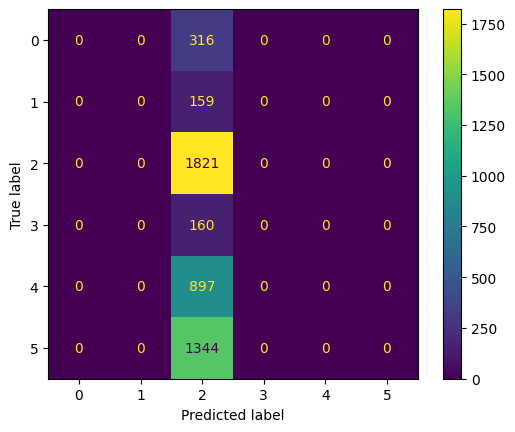

In [52]:
#Confusion Matrix for SVM model
cm = metrics.confusion_matrix(y_test, svm_model.predict(X_test))
n_classes = cm.shape[0]
display_labels = [str(i) for i in range(n_classes)]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

cm_display.plot()
plt.show()

In [59]:
# Create a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [61]:
# Make predictions
logistic_y_pred = logistic_model.predict(X_test)

In [62]:
# Evaluate performance
accuracy_logistic = accuracy_score(y_test, logistic_y_pred)
precision_logistic = precision_score(y_test, logistic_y_pred, average = 'macro')
recall_logistic = recall_score(y_test, logistic_y_pred, average = 'macro')
f1_logistic = f1_score(y_test, logistic_y_pred, average = 'macro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
print(f"Logistic Regression:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print(f"Precision: {precision_logistic:.2f}")
print(f"Recall: {recall_logistic:.2f}")
print(f"F1 Score: {f1_logistic:.2f}")

Logistic Regression:
Accuracy: 0.39
Precision: 0.06
Recall: 0.17
F1 Score: 0.09


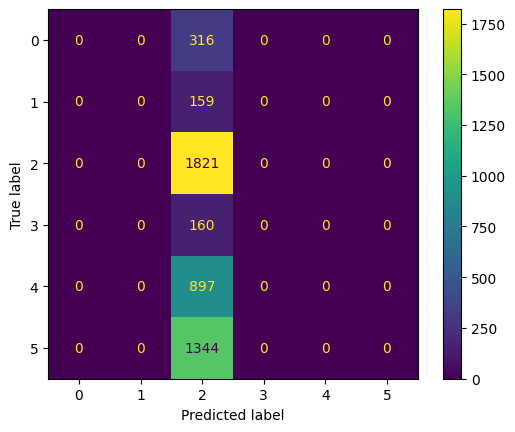

In [64]:
#Confusion Matrix for Logistic Regression model
cm = metrics.confusion_matrix(y_test, logistic_model.predict(X_test))
n_classes = cm.shape[0]
display_labels = [str(i) for i in range(n_classes)]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

cm_display.plot()
plt.show()

In [43]:
decisiontree_model = DecisionTreeClassifier(max_depth = 6, class_weight = 'balanced')
decisiontree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6)

In [44]:
y_pred =decisiontree_model.predict(X_test)

In [45]:
# Evaluate performance
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred, average = 'macro')
recall_dt = recall_score(y_test, y_pred, average = 'macro')
f1_dt = f1_score(y_test, y_pred, average = 'macro')

In [46]:
print(f"Decision Tree:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")

Decision Tree:
Accuracy: 0.26
Precision: 0.24
Recall: 0.20
F1 Score: 0.16


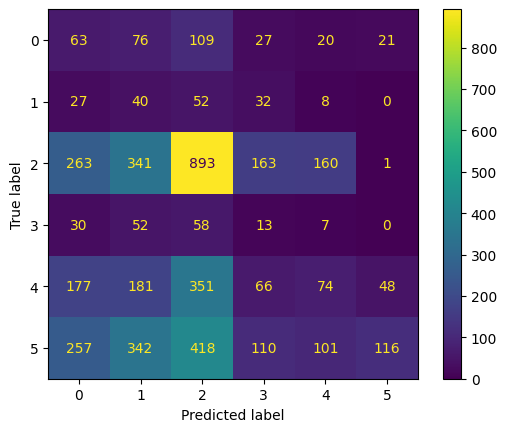

In [47]:
#Confusion Matrix for Decision Tree Classifier model
cm = metrics.confusion_matrix(y_test, decisiontree_model.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
n_classes = cm.shape[0]  # Get the number of classes
display_labels = [str(i) for i in range(n_classes)]  # Generate labels dynamically

cm_display.plot()
plt.show()